***CHARMI YASHWANT KANANI***

***GO_STP_755***

##**Predict Loan Eligibility for Dream Housing Finance company**

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('/content/Loan Prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [9]:
df['Gender'].fillna(df['Gender'].value_counts().index[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].value_counts().index[0],inplace=True)
df['Married'].fillna(df['Married'].value_counts().index[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().index[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].value_counts().index[0],inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
del df['Loan_ID']

In [12]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

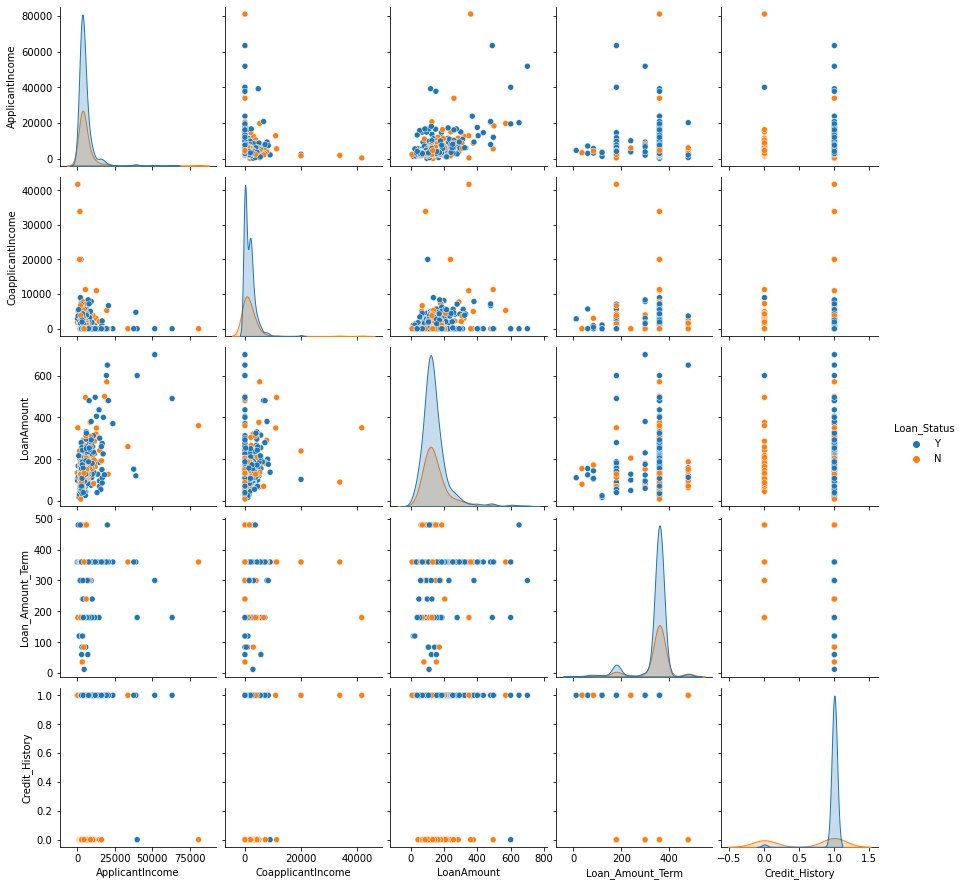

In [13]:
sns.pairplot(df, hue = 'Loan_Status')

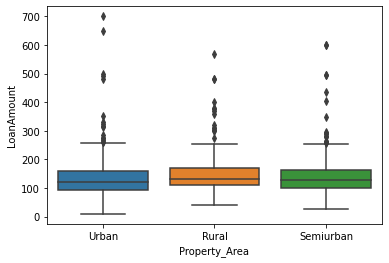

In [14]:
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', data = df)

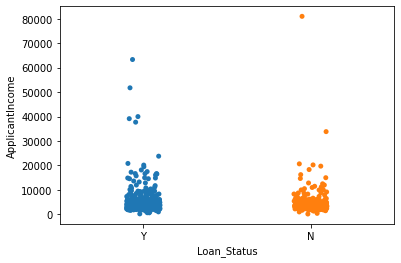

In [15]:
sns.stripplot(x = 'Loan_Status', y = 'ApplicantIncome', data = df)

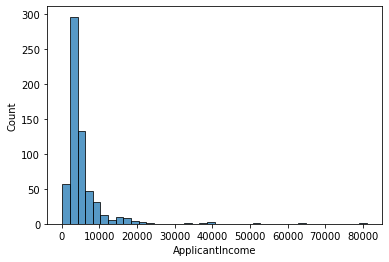

In [16]:
sns.histplot(df['ApplicantIncome'], bins = 40)

In [17]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [18]:
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [19]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,Urban,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,Rural,1,1,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,1,1,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,0,1


In [20]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype('int')

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

In [22]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,2,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,2,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,2,1,1,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,2,1,0,0,0,1


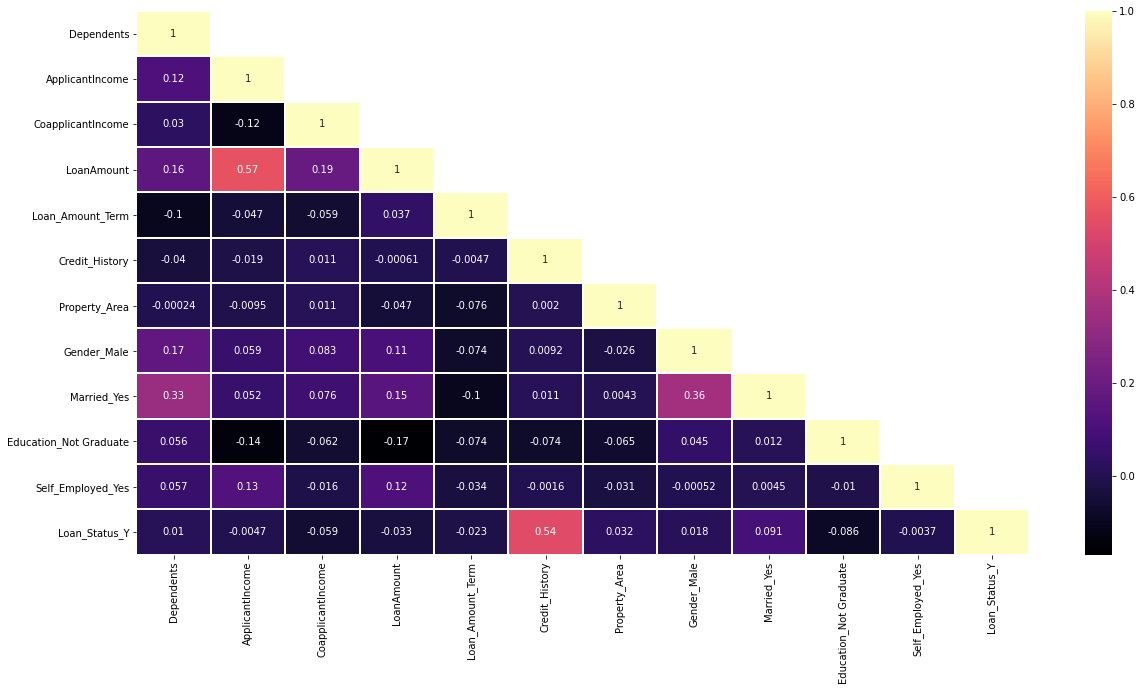

In [23]:
plt.figure(figsize = (20,10)) 
cor = df.corr()
np.tril(np.ones(cor.shape)).astype(np.bool)
Lower_M = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(Lower_M,cmap = 'magma', linecolor = 'white', linewidths = 1, annot = True)
plt.show()

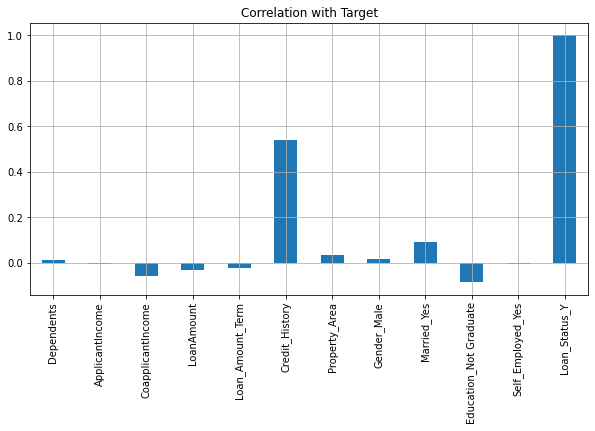

In [24]:
df.corrwith(df['Loan_Status_Y']).plot.bar(figsize=(10,5),title = 'Correlation with Target', fontsize = 10, rot = 90,grid = True)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Loan_Status_Y', axis = 1)
y = df['Loan_Status_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
pred = clf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[24, 16],
       [15, 68]])

In [28]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, pred))

Accuracy:  0.7479674796747967
